# Gravitasjonssvingninger?

Vi borer et hull gjennom jordkloden og hopper oppi. Vi antar at jorden er en fast kule med uniform tetthet. Hvordan blir bevegelsen vår? Vi antar at hullet er vakuum, slik at vi kan se bort fra luftmotstand.

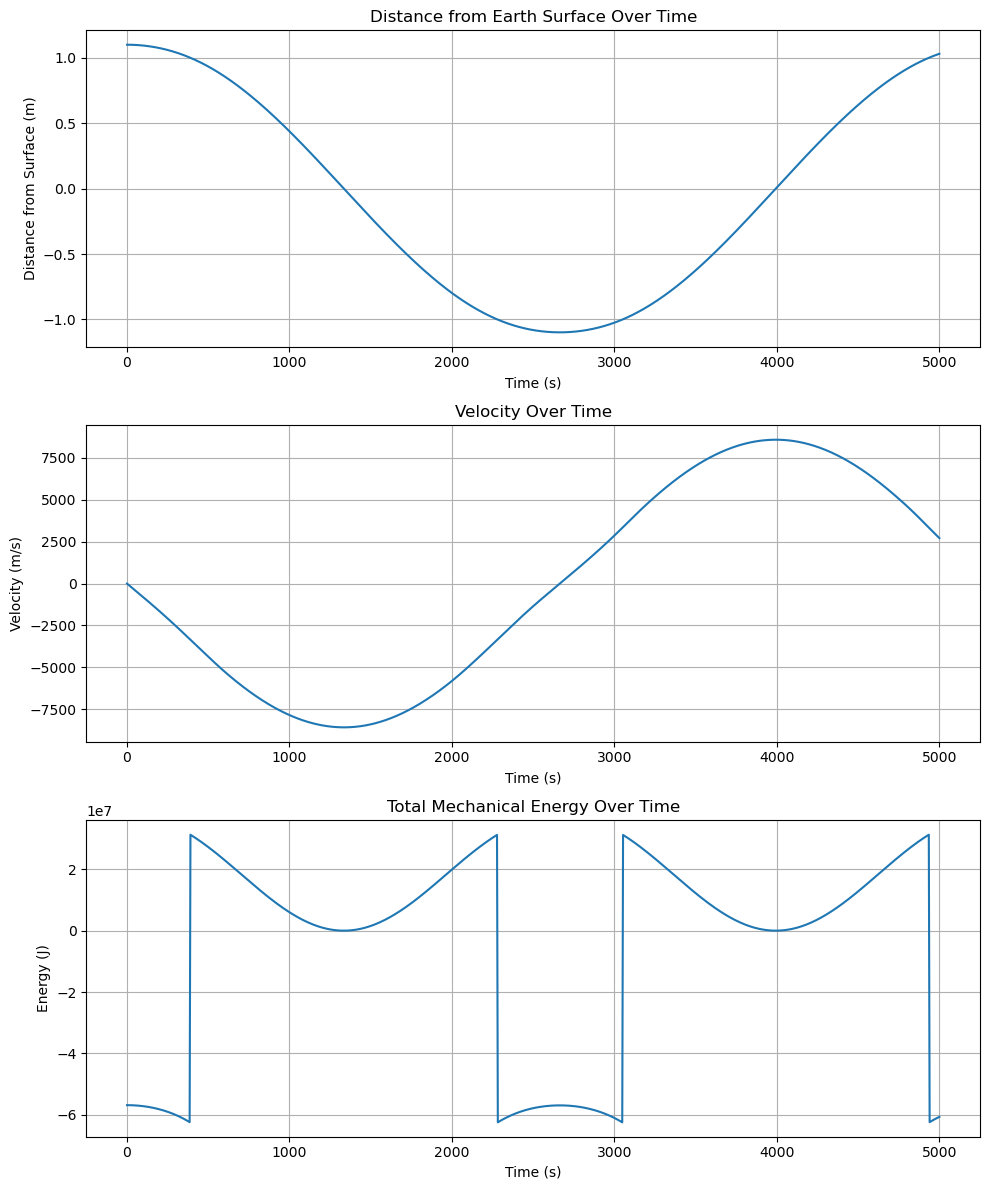

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

G = 6.67430e-11  # Gravitational constant
R_earth = 6371e3  # Radius of Earth in meters
M_earth = 5.972e24  # Mass of Earth in kg

def newton_gravity_acc(M, R, r):
    if abs(r) > R:
        return -G * M / r**2 * np.sign(r)
    else:
        return -G * M * r / R**3

def newton_gravity_energy(M, R, r):
    if abs(r) > R:
        return -G * M / abs(r)
    else:
        return G * M * (r**2 + R**2 )/ (2 * R**3)

def rhs(t, y):
    r, v = y
    drdt = v
    dvdt = newton_gravity_acc(M_earth, R_earth, r)  # Damping term
    return [drdt, dvdt]

# Initial condition
r0 = R_earth*1.1  # Initial distance from Earth's center (1000 meters above surface)
v0 = 0.0  # Initial velocity (free fall)
y0 = [r0, v0]

# Time span for the simulation
t_span = (0, 5000)  # Simulate for 500 seconds
t_eval = np.linspace(t_span[0], t_span[1], 1000)
# Solve the ODE
solution = solve_ivp(rhs, t_span, y0, t_eval=t_eval)
# Extract results
r = solution.y[0]
v = solution.y[1]
t = solution.t

U = np.array([newton_gravity_energy(M_earth, R_earth, ri) for ri in r])  # Gravitational potential energy
K = 0.5 * v**2  # Kinetic energy
E = U #+ K  # Total mechanical energy


# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 12))
ax[0].plot(t, r/R_earth)  # Plot distance from Earth's center distance normalized by Earth's radius
ax[0].set_title('Distance from Earth Surface Over Time')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Distance from Surface (m)')
ax[0].grid()
ax[1].plot(t, v)
ax[1].set_title('Velocity Over Time')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Velocity (m/s)')
ax[1].grid()
ax[2].plot(t, E)
ax[2].set_title('Total Mechanical Energy Over Time')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Energy (J)')
ax[2].grid()
plt.tight_layout()
plt.show()